In [9]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.lines as mlines


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [10]:
# Target accounts
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")


# Set variables to hold sentiments
sentiments = []
avg_compound_list = []
all_sentiment_list = []

# Loop through each user
for user in target_users:

    # Set counter
    counter = 1
    
    # Variable for holding the oldest tweet
    oldest_tweet = None
    
    # Variables for holding sentiments- inside of for loop bec for each user, we want to re-initialize it
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Get 100 most recent tweets
    public_tweets = api.user_timeline(user, count =100, result_type="recent", max_id=oldest_tweet)
    #print(public_tweets)
  
    # Loop through tweets 
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
            
            # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
        sentiments.append({"Date": tweet["created_at"], 
                               "Username": user,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
        counter += 1
    
    avg_sentiments = np.mean(compound_list)
    all_sentiment_list.append(avg_sentiments)
    #sentiment_list = {"User": user, "Compound": np.mean(compound_list)}

    # Print averages
    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.3f}")
    print(f"Positive: {np.mean(positive_list):.3f}")
    print(f"Neutral: {np.mean(neutral_list):.3f}")
    print(f"Negative: {np.mean(negative_list):.3f}")

User: @BBC
Compound: 0.115
Positive: 0.098
Neutral: 0.850
Negative: 0.052
User: @CBS
Compound: 0.124
Positive: 0.079
Neutral: 0.890
Negative: 0.031
User: @CNN
Compound: -0.024
Positive: 0.057
Neutral: 0.877
Negative: 0.066
User: @FoxNews
Compound: -0.201
Positive: 0.038
Neutral: 0.835
Negative: 0.128
User: @nytimes
Compound: -0.008
Positive: 0.071
Neutral: 0.857
Negative: 0.072


In [11]:
news_df = pd.DataFrame(sentiments).set_index("Username").round(2)

news_df.head()
#news_df

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
Username,,,,,,
@BBC,-0.13,Mon Aug 06 19:03:02 +0000 2018,0.70,0.16,0.14,1
@BBC,0.36,Mon Aug 06 18:01:05 +0000 2018,0.65,0.13,0.22,2
@BBC,0.67,Mon Aug 06 17:38:11 +0000 2018,0.74,0.00,0.26,3
@BBC,0.21,Mon Aug 06 16:03:06 +0000 2018,0.92,0.00,0.08,4
@BBC,0.10,Mon Aug 06 15:05:06 +0000 2018,0.76,0.11,0.13,5


In [12]:
len(sentiments)

500

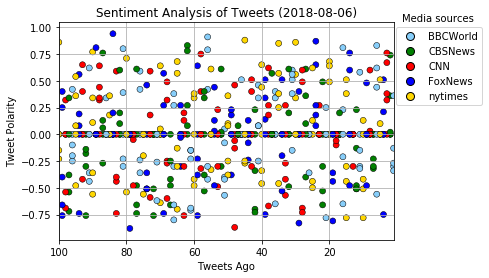

In [13]:
# Create plot
x_vals = news_df["Tweets Ago"]
y_vals = news_df["Compound"]
plt.scatter(x_vals,
         y_vals, marker="o", linewidth=0.5, edgecolors = 'black',
         alpha=1, c = ['LightSkyBlue', 'g', "r", "b", "gold"])

line1 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8, markerfacecolor="LightSkyBlue", markeredgecolor='black')
line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8, markerfacecolor="green",markeredgecolor='black')
line3 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8, markerfacecolor="Red",markeredgecolor='black')
line4 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8, markerfacecolor="Blue",markeredgecolor='black')
line5 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8, markerfacecolor="Gold",markeredgecolor='black')
plt.legend((line1,line2,line3,line4,line5),('BBCWorld','CBSNews', 'CNN', 'FoxNews','nytimes'),numpoints=1, loc=1,bbox_to_anchor=(1.28, 1))
plt.text(-12, 1.09,'Media sources', ha='center', va='center')

plt.grid(True)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.xlim([x_vals.max(),x_vals.min()]) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Images/sentiment_analysis.png")
plt.show()

In [6]:
all_sentiment_list

[0.11474400000000001,
 0.12408199999999997,
 -0.023515999999999995,
 -0.20059100000000002,
 -0.007670999999999987]

In [7]:
avg_sentiment = {'User': target_users, 'Avg_Compound_Score': all_sentiment_list}
avg_sentiment_df = pd.DataFrame(avg_sentiment)
avg_sentiment_df

,User,Avg_Compound_Score
0,@BBC,0.114744
1,@CBS,0.124082
2,@CNN,-0.023516
3,@FoxNews,-0.200591
4,@nytimes,-0.007671


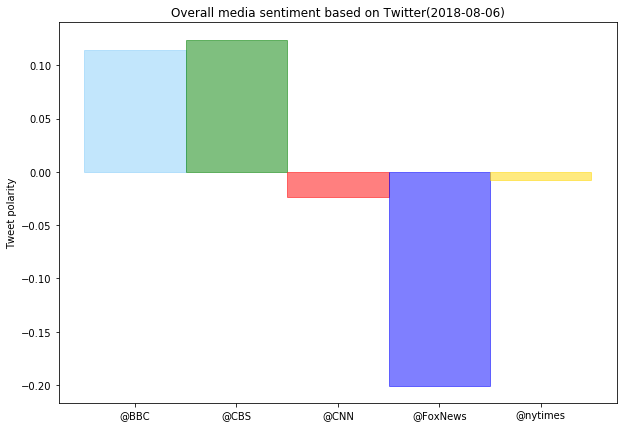

In [15]:
colors=["LightSkyBlue","Green","Red","Blue","Gold"]
x_values = np.arange(len(avg_sentiment_df))
plt.figure(figsize=(10, 7))
barlist=plt.bar(x_values, avg_sentiment_df["Avg_Compound_Score"], alpha=0.5, align='center', width=1)
plt.title(f"Overall media sentiment based on Twitter({now})")
plt.xticks(x_values, avg_sentiment_df["User"], rotation="horizontal")
plt.ylabel("Tweet polarity")
tick_locations = [value for value in x_vals]

for i in range(len(barlist)):
    barlist[i].set_color(colors[i])

plt.savefig("Images/overall_sentiment.png")
plt.show()